## Diagramme de bande premiers voisins et seconds voisins

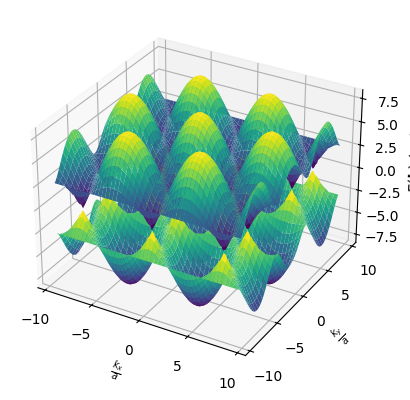

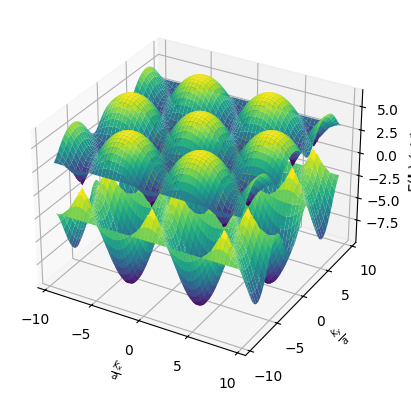

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = 0
a = 1 # Le paramètre de maille est donc l'unité de longueur
a_0 = a / np.sqrt(3)  # Le paramètre de maille est donc l'unité de longueur
t_hop = -2.7 # eV
t_hop_prime = 0.1 * t_hop

kx = np.linspace(-3*np.pi,3*np.pi,1000)
ky = np.linspace(-3*np.pi,3*np.pi,1000)
kx, ky = np.meshgrid(kx, ky)

k = np.array([kx, ky])
a1 = a / 2 * np.array([np.sqrt(3), 1])
a2 = a / 2 * np.array([np.sqrt(3), -1])

dot_k_a1 = np.tensordot(k, a1, axes=(0, 0))  
dot_k_a2 = np.tensordot(k, a2, axes=(0, 0))  
dot_k_a2_a1 = np.tensordot(k, a2 - a1, axes=(0, 0))

 ### Premiers voisins ###
E_n = epsilon - t_hop * np.sqrt(3 + 2 * np.cos(dot_k_a2_a1) + 2 * np.cos(dot_k_a1) + 2 * np.cos(dot_k_a2))
E_p = epsilon + t_hop * np.sqrt(3 + 2 * np.cos(dot_k_a2_a1) + 2 * np.cos(dot_k_a1) + 2 * np.cos(dot_k_a2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(kx, ky, E_n, cmap='viridis')
ax.plot_surface(kx, ky, E_p, cmap='viridis')
ax.set_xlabel(r'$\frac{k_x}{a}$')
ax.set_ylabel(r'$\frac{k_y}{a}$')
ax.set_zlabel(r'E($\mathbf{k}$) (eV)')

plt.show()

### Second voisins ###
E_n_2 = (epsilon + 2 * t_hop_prime * (np.cos(dot_k_a1) + np.cos(dot_k_a2) + np.cos(dot_k_a2_a1))) \
        - t_hop * np.sqrt(3 + 2 * np.cos(dot_k_a2_a1) + 2 * np.cos(dot_k_a1) + 2 * np.cos(dot_k_a2))
E_p_2 = (epsilon + 2 * t_hop_prime * (np.cos(dot_k_a1) + np.cos(dot_k_a2) + np.cos(dot_k_a2_a1))) \
        + t_hop * np.sqrt(3 + 2 * np.cos(dot_k_a2_a1) + 2 * np.cos(dot_k_a1) + 2 * np.cos(dot_k_a2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(kx, ky, E_n_2, cmap='viridis')
ax.plot_surface(kx, ky, E_p_2, cmap='viridis')
ax.set_xlabel(r'$\frac{k_x}{a}$')
ax.set_ylabel(r'$\frac{k_y}{a}$')
ax.set_zlabel(r'E($\mathbf{k}$) (eV)')

plt.show()



## GIF impulsion électrique

In [15]:
import numpy as np

epsilon = 0
a = 1 # Le paramètre de maille est donc l'unité de longueur
t_hop = -2.7 # eV
hbar = 6.582119570e-16  # eV/s
time = np.linspace(0, 20e-15, 50)

a1 = a / 2 * np.array([3, np.sqrt(3)])
a2 = a / 2 * np.array([3, -np.sqrt(3)])

N = 300  # Nombre de points
L = 300   # Taille du domaine
kx = 2 * np.pi * np.fft.fftfreq(N, d=L / N)
ky = 2 * np.pi * np.fft.fftfreq(N, d=L / N)

KX, KY = np.meshgrid(kx, ky)

# Relation de dispersion
t_hop = -2.7
E_k_p = epsilon + t_hop * np.sqrt(3 + 2 * np.cos(KX * (a2 - a1)[0] + KY * (a2 - a1)[1]) + 2 * np.cos(KX * a1[0] + KY * a1[1]) + 2 * np.cos(KX * a2[0] + KY * a2[1]))
E_k_n = epsilon - t_hop * np.sqrt(3 + 2 * np.cos(KX * (a2 - a1)[0] + KY * (a2 - a1)[1]) + 2 * np.cos(KX * a1[0] + KY * a1[1]) + 2 * np.cos(KX * a2[0] + KY * a2[1]))

def animate_from_jpgs(
    file_prefix, amount, filetype='.png', animation_name = 'animation.gif',
    fps=None, duration=None, delete = True):

    import imageio.v2 as imageio
    import os

    images = []
    images_path = [
        file_prefix + str(frame) + filetype for frame in range(amount)
        ]

    for filename in images_path:
        images.append(imageio.imread(filename))

    if (fps and duration) is not None:
      raise(ValueError('Cannot give both fps and duration values. Choose one.'))

    elif fps is not None:
      imageio.mimsave(animation_name, images, fps=fps)

    elif duration is not None:
      imageio.mimsave(animation_name, images, duration=duration)

    else: imageio.mimsave(animation_name, images)

    if delete:
        for file in images_path:
            if os.path.isfile(file):
                os.remove(file)


# Opérateur d'évolution
for i,t in enumerate(time):
    facteur_evolution_p = 1/np.sqrt(2) * np.exp(-1j * E_k_p * t / hbar)
    facteur_evolution_n = 1/np.sqrt(2) * np.exp(-1j * E_k_n * t / hbar)

    psi_k0 = np.ones_like(E_k_n, dtype=complex)

    psi_k_p = psi_k0 * facteur_evolution_p
    psi_k_n = psi_k0 * facteur_evolution_n

    psi_r_p = np.fft.ifft2(psi_k_p)
    psi_r_n = np.fft.ifft2(psi_k_n)

    psi_r_p = np.fft.fftshift(psi_r_p)
    psi_r_n = np.fft.fftshift(psi_r_n)


    x = np.linspace(-L/2, L/2, N)
    y = np.linspace(-L/2, L/2, N)

    densite_p = np.abs(psi_r_p)**2
    densite_n = np.abs(psi_r_n)**2

    # Plot 
    import matplotlib.pyplot as plt
    plt.imshow(densite_p, extent=[x.min(), x.max(), y.min(), y.max()])
    plt.colorbar(label="|ψ(r, t)|")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("")

    plt.savefig(f'wavefunction{i}.png')
    plt.clf()


plt.show()
plt.close()

# Créer le gif
animate_from_jpgs('wavefunction', len(time), fps=5, animation_name='wavefunction_NN_2D.gif', delete=True)


<Figure size 640x480 with 0 Axes>

## Comparaison armchair - plan infini

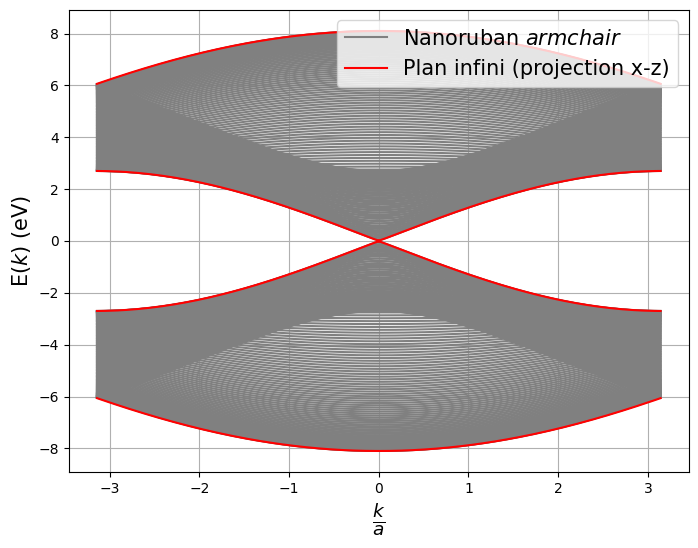

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix

kx = np.linspace(-3*np.pi,3*np.pi,1000)
ky = np.linspace(-3*np.pi,3*np.pi,1000)

# Masques
mask_kx = np.abs(kx) < np.pi * a_0
mask_ky = np.abs(ky) < np.pi

# --- projection x-z  ---
E_n_min_y = np.min(E_n, axis=0)
E_n_max_y = np.max(E_n, axis=0)
E_p_min_y = np.min(E_p, axis=0)
E_p_max_y = np.max(E_p, axis=0)

# --- projection y-z ---
E_n_min_x = np.min(E_n, axis=1)
E_n_max_x = np.max(E_n, axis=1)
E_p_min_x = np.min(E_p, axis=1)
E_p_max_x = np.max(E_p, axis=1)

# Paramètres                   
kpts = np.linspace(-np.pi, np.pi, len(E_n_min_y[mask_kx]))         
N = 150                    # Largeur du nanoruban

### Reprise du code nanorubans ###

def hamiltonien_armchair_sparse(k, N, a, t):
    """
    Construit la matrice du Hamiltonien H(k) creuse de dimension 2N x 2N pour un ruban armchair,
    dans la base [a1, b1, a2, b2, ..., aN, bN].
    Utilise lil_matrix pour une construction efficace.
    """
    dim = 2 * N
    # Utiliser lil_matrix pour la construction élément par élément
    H = lil_matrix((dim, dim), dtype=complex)

    # Sauts intra–dimère (vertical sur le dessin classique) : type t
    for m in range(N): # m de 0 à N-1 (indices Python)
        idx_a = 2*m
        idx_b = 2*m + 1
        H[idx_a, idx_b] = t
        H[idx_b, idx_a] = t # Hermitien

    # Sauts inter–dimères : type t également
    for m in range(N - 1): # m de 0 à N-2
        # Liaison b_m -> a_{m+1} (diagonale sans phase k)
        idx_b_m = 2*m + 1
        idx_a_m_plus_1 = 2*(m + 1)
        H[idx_b_m, idx_a_m_plus_1] = t
        H[idx_a_m_plus_1, idx_b_m] = t # Hermitien

        # Liaison a_m -> b_{m+1} (diagonale avec phase k*a)
        idx_a_m = 2*m
        idx_b_m_plus_1 = 2*(m + 1) + 1
        phase_factor = t * np.exp(-1j * k * a) # a est le paramètre de maille effectif le long de k
        H[idx_a_m, idx_b_m_plus_1] = phase_factor
        H[idx_b_m_plus_1, idx_a_m] = np.conjugate(phase_factor) # Hermitien

    # Convertir en format CSR pour des calculs efficaces
    return H.tocsr()

def energy(k, N, a, t):
    H = hamiltonien_armchair_sparse(k, N, a, t)
    E = np.linalg.eigvalsh(H.toarray())
    return np.sort(E)

# Calcul des énergies pour chaque k
E_all = np.array([energy(k, N, a, t_hop) for k in kpts])

# Affichage de la structure de bandes
plt.figure(figsize=(8, 6))
for band in range(2 * N):
    if band == 1:
        plt.plot(kpts, E_all[:, band].real, color = 'grey', label=r'Nanoruban $armchair$')
    else:
        plt.plot(kpts, E_all[:, band].real, color = 'grey')
plt.plot(kpts, E_n_min_y[mask_kx], color='red', label='Plan infini (projection x-z)')
plt.plot(kpts, E_n_max_y[mask_kx], color='red')
plt.plot(kpts, E_p_min_y[mask_kx], color='red')
plt.plot(kpts, E_p_max_y[mask_kx], color='red')
plt.xlabel(r'$\frac{k}{a}$', fontsize=19)
plt.ylabel(r'E($k$) (eV)',fontsize=15)
plt.grid(True)
plt.legend(loc='upper right', fontsize=15)

plt.savefig('comparaison_x-z_armchair.png', dpi=400)
plt.show()

## Comparaison zigzag - plan infini

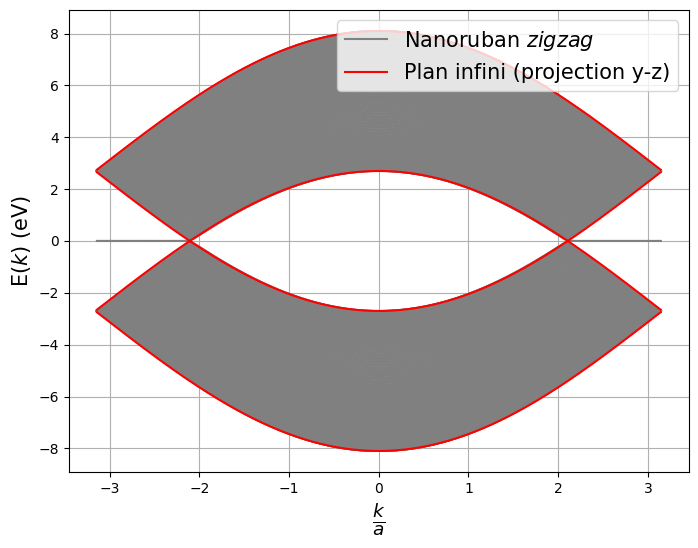

In [19]:
kpts = np.linspace(-np.pi/a, np.pi/a, len(E_n_min_x[mask_ky]))         
N = 150  # Largeur du nanoruban


### Reprise du code nanorubans ###
def hamiltonien_zigzag_sparse(k, N, a, t):
    """
    Construit la matrice Hamiltonienne H(k) pour un nanoruban zigzag.
    (Identique à la version précédente)
    """
    dim = 2 * N
    H = lil_matrix((dim, dim), dtype=complex)
    gamma_k = 1 + np.exp(-1j * k * a)
    gamma_k_conj = np.conjugate(gamma_k)

    for m in range(N):
        idx_a = 2 * m
        idx_b = 2 * m + 1
        H[idx_a, idx_b] = -t * gamma_k
        H[idx_b, idx_a] = -t * gamma_k_conj

    for m in range(N - 1):
        idx_b_m = 2 * m + 1
        idx_a_m_plus_1 = 2 * (m + 1)
        H[idx_a_m_plus_1, idx_b_m] = -t
        H[idx_b_m, idx_a_m_plus_1] = -t

    return H.tocsr()

def energy(k, N, a, t):
    H = hamiltonien_zigzag_sparse(k, N, a, t)
    E = np.linalg.eigvalsh(H.toarray())
    return np.sort(E)

# Calcul des énergies pour chaque k
E_all = np.array([energy(k, N, a, t_hop) for k in kpts])

# Affichage de la structure de bandes
plt.figure(figsize=(8, 6))
for band in range(2 * N):
    if band == 1:
        plt.plot(kpts, E_all[:, band].real, color = 'grey', label=r'Nanoruban $zigzag$')
    else:
        plt.plot(kpts, E_all[:, band].real, color = 'grey')
plt.plot(kpts, E_n_min_x[mask_ky], color='red', label='Plan infini (projection y-z)')
plt.plot(kpts, E_n_max_x[mask_ky], color='red')
plt.plot(kpts, E_p_min_x[mask_ky], color='red')
plt.plot(kpts, E_p_max_x[mask_ky], color='red')
plt.xlabel(r'$\frac{k}{a}$', fontsize=19)
plt.ylabel(r'E($k$) (eV)', fontsize=15)
plt.grid(True)
plt.legend(loc = 'upper right',fontsize=15)

plt.savefig('comparaison_y-z_zigzag.png', dpi=400)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
a_0 = 1
a = np.sqrt(3) * a_0                    # Constante de réseau
kpts = np.linspace(-np.pi/a, np.pi/a, 500)
t = -1.0                   # Amplitude de saut intra–cellule
te = -1.0          # Amplitude de saut inter–cellule
N_values = [3, 4, 6, 7, 9, 10, 25, 51, 75, 100, 150, 201, 250, 300, 351, 400]                   # Largeur du nanoruban

gaps = []

for N in N_values:

    # Calcul des énergies pour chaque k
    E_all = np.array([energy(k, N, a, t) for k in kpts])

    energies = E_all.flatten()

    # Sépare les deux bandes
    valence_band = energies[energies <= 0]  # états occupés
    conduction_band = energies[energies > 0]  # états vides

    # Max valence et min conduction
    E_vmax = np.max(valence_band)
    E_cmin = np.min(conduction_band)

    # Calcul du gap d'énergie
    gap = E_cmin - E_vmax

    gaps.append(gap)

# power law, on trouve les coefficients
coeff = np.polyfit(np.log(N_values), np.log(gaps), 1)

# Paramètres
slope, intercept = coeff

x_fit = np.linspace(3, 400, 500)
y_fit = np.exp(intercept) * x_fit ** slope

plt.figure(figsize=(8,6))
plt.scatter(N_values, gaps, color='red', marker='d', label = "Données")
plt.plot(x_fit, y_fit, label=f"Loi de puissance: Gap = {np.exp(intercept):.4f}/(N**{-slope:.4f})", color="grey")
plt.xlabel(r'Largeur du nanoruban $armchair$ $N$', fontsize=15)
plt.ylabel('Gap d\'énergie (eV)', fontsize=15)
plt.legend(fontsize=15)
plt.grid()

plt.savefig('limite_gap.png', dpi=400)
plt.show()
